<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_CursoPython/blob/main/ModelosNoSupervisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autores:** Edna Viviana Segura Alvarado - Hans Mauricio Carrillo Hernández

**Institución:** Universidad de la Rioja

**Fecha:** Junio/2025




# CURSO - PYTHON: PROGRAMACIóN DE IA

**Módulo: Aprendizaje no supervisado**

En el aprendizaje supervisado, el sistema aprende a partir de ejemplos etiquetados, es decir, datos donde ya conocemos la respuesta correcta. El objetivo es construir un modelo que prediga etiquetas para nuevos datos. Por ejemplo: clasificar correos como "spam" o "no spam" usando ejemplos previamente etiquetados.

En cambio, en el *aprendizaje no supervisado*, el sistema trabaja con datos sin etiquetas y busca patrones ocultos por sí mismo. Aquí no hay respuestas correctas de antemano; el algoritmo explora la estructura intrínseca de los datos. Un ejemplo típico es agrupar clientes con comportamientos similares sin conocer previamente las categorías.

<center>
 <img src="https://raw.githubusercontent.com/ednavivianasegura/AccesoImages/aaa31fdeb3eb3a27d54280be8b9e45614b9a634a/clustering_diferencias.png" alt="descriptiva" width="50%" height="50%">  
</center>
Imagen tomada de  [Unsupervised Learning with Python: A Beginner's Guide, Vihar Kurama](https://builtin.com/data-science/unsupervised-learning-python)




**Objetivos:**

- Encontrar estructuras ocultas en los datos.

- Agrupar datos similares (clustering).

- Reducir la dimensionalidad para visualización o eficiencia.

**Aplicaciones:** Segmentación de clientes, detección de anomalías, compresión de imágenes, etc.



## Clustering

El clustering (o agrupamiento) es una técnica de aprendizaje no supervisado cuyo objetivo es dividir un conjunto de datos en grupos homogéneos (llamados clusters), de tal manera que:

* Intra-cluster: Los puntos dentro de un mismo cluster sean similares entre sí (minimizar varianza interna).

* Inter-cluster: Los puntos de clusters distintos sean diferentes (maximizar distancia entre clusters).

## Tipos de Clustering

Existen dos enfoques principales, diferenciados por su estructura y forma de asignar clusters:

### Clustering Jerárquico

Construye una jerarquía de clusters representada como un árbol (dendrograma), donde cada nodo es una fusión o división de clusters.

**Subtipos:**

* Agglomerativo (bottom-up): Cada punto inicia como un cluster y se fusionan iterativamente.

* Divisivo (top-down): Todos los puntos inician en un cluster y se dividen recursivamente.

**Ventaja:** No requiere especificar el número de clusters a priori.

### Clustering No Jerárquico

Asigna puntos a clusters directamente, sin estructura jerárquica. Los clusters son planos y definitivos.

**Algoritmos comunes:**

* K-means: Minimiza la varianza intra-cluster.

* DBSCAN: Basado en densidad y detección de outliers.

**Ventaja:** Computacionalmente eficiente para grandes conjuntos de datos.


In [4]:
# @title Librerías ecesarias


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


1. **Cluster jerárquico o aglomerativo:**

Imaginemos que somos nutricionistas investigando la relación entre peso y estatura en un grupo de pacientes. Contamos con datos de 200 personas (peso en kg y estatura en cm), pero no tenemos información previa sobre categorías como *bajo peso*, *peso normal* o *sobrepeso*. Nuestro objetivo es descubrir si existen grupos naturales en estos datos que nos permitan identificar patrones relevantes para personalizar planes alimenticios."


Supongamos que los datos provienen de chequeos médicos rutinarios en una clínica de nutrición durante el último año. Cada registro contiene:

* Peso (kg): Variable numérica continua

* Estatura (cm): Variable numérica continua

Actualmente, la clínica clasifica manualmente a los pacientes en tres categorías de peso según tablas de IMC, pero sospechamos que podrían existir subgrupos más específicos que requieran intervenciones diferenciadas.

* Utilizaremos clustering jerárquico para identificar grupos naturales sin imponer categorías preconcebidas

* Visualizar cómo se relacionan las observaciones

* Determinar si las agrupaciones coinciden con las categorías tradicionales de IMC"



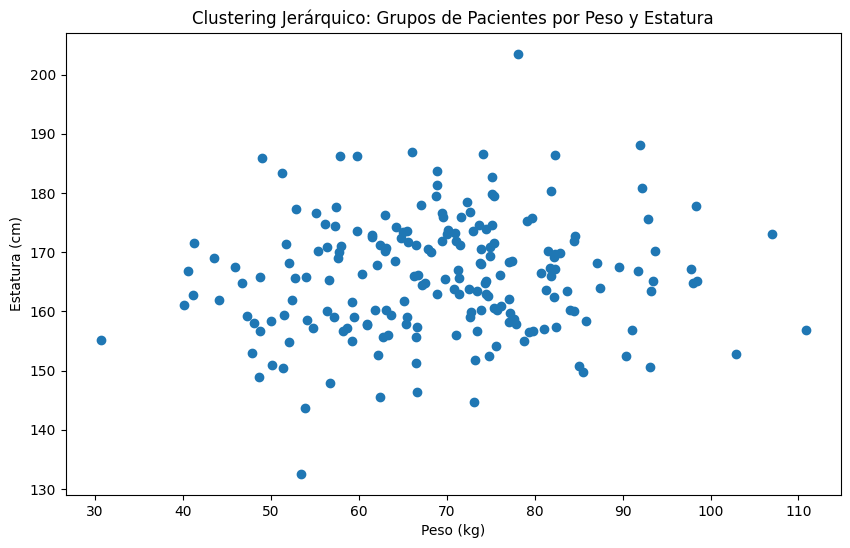

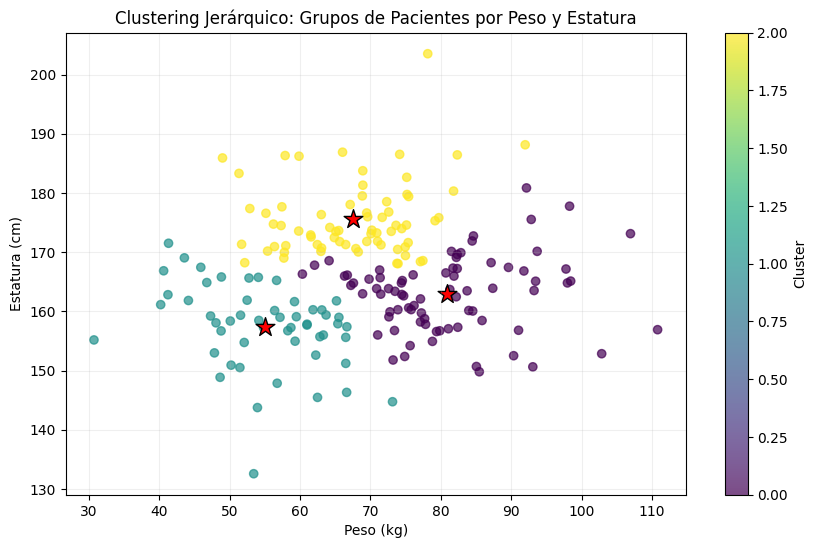

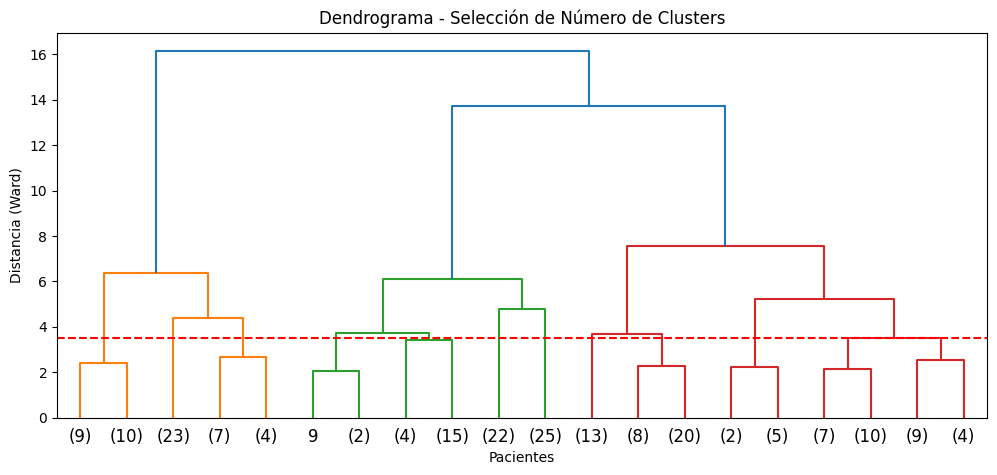

              Peso               Estatura          
              mean        std        mean       std
Cluster                                            
0        80.860876  10.278954  162.965626  6.281787
1        54.965663   8.709041  157.418499  7.077869
2        67.497951   8.738286  175.612132  6.359663


In [11]:
# Datos simulados (peso en kg y estatura en cm)
np.random.seed(42)
pesos = np.random.normal(loc=70, scale=15, size=200)  # 200 valores centrados en 70 kg
estaturas = np.random.normal(loc=165, scale=10, size=200)  # 200 valores centrados en 165 cm


# Combinar en una matriz y escalar (importante para clustering jerárquico)
X = np.column_stack((pesos, estaturas))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Estandarizar para que ambas variables tengan igual peso


#graficamos los datos originales
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (cm)')
plt.title('Clustering Jerárquico: Grupos de Pacientes por Peso y Estatura')





# ----------- #

# Configurar modelo
cluster_jerarquico = AgglomerativeClustering(
    n_clusters=3,            # Número de clusters (ajustable)
    metric='euclidean',       # Métrica de distancia
    linkage='ward'           # Criterio de fusión (minimiza varianza intra-cluster)
)

# Aplicar a los datos
etiquetas = cluster_jerarquico.fit_predict(X_scaled)


# ----------- #

# Graficar clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=etiquetas, cmap='viridis', alpha=0.7)
plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (cm)')
plt.title('Clustering Jerárquico: Grupos de Pacientes por Peso y Estatura')
plt.colorbar(label='Cluster')
plt.grid(True, alpha=0.2)

# Añadir centroides (opcional)
for cluster_id in np.unique(etiquetas):
    centroide = X[etiquetas == cluster_id].mean(axis=0)
    plt.scatter(centroide[0], centroide[1], marker='*', s=200, c='red', edgecolor='black')
plt.show()


# ----------- #


# Calcular linkage matrix
Z = linkage(X_scaled, method='ward')

# Plotear dendrograma
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=True)
plt.axhline(y=3.5, color='r', linestyle='--')  # Línea para sugerir 3 clusters
plt.title('Dendrograma - Selección de Número de Clusters')
plt.xlabel('Pacientes')
plt.ylabel('Distancia (Ward)')
plt.show()

# Estadísticas por cluster
import pandas as pd
df = pd.DataFrame(X, columns=['Peso', 'Estatura'])
df['Cluster'] = etiquetas

print(df.groupby('Cluster').agg({
    'Peso': ['mean', 'std'],
    'Estatura': ['mean', 'std']
}))


2.  K-means:

**Objetivo:** Dividir datos en k grupos (clusters) donde cada punto pertenece al grupo con la media (centroide) más cercana.

**Pasos:**

* Seleccionar k centroides aleatorios.

* Asignar cada punto al centroide más cercano.

* Recalcular los centroides.

* Repetir hasta convergencia.

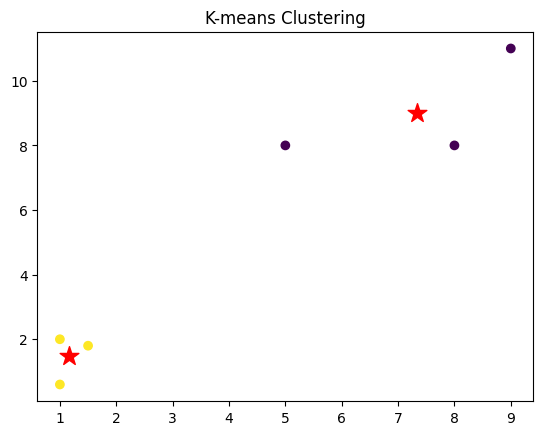

In [1]:
# Datos de ejemplo
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

# Crear modelo K-means (k=2)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Obtener clusters y centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualizar
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red')
plt.title("K-means Clustering")
plt.show()

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Datos Iris (2D con PCA para simplificar)
Z = linkage(X_pca, 'ward')

# Dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Jerárquico: Estructura en árbol de clusters")
plt.show()

NameError: name 'X_pca' is not defined